# <center><b> `HCHO Gas Forcasting model - ARIMA`</b></center>

### `Importing libraries`


In [59]:
import pandas as pd


### `Load the datasets`

In [60]:
df_col_mat_nuw = pd.read_csv('Data Sets\col_mat_nuw_output.csv')
df_kan = pd.read_csv('Data Sets\kan_output.csv')
df_mon_kur_jaf = pd.read_csv('Data Sets\mon_kur_jaf_output.csv')

In [61]:
# Adding Column names
columns = ['HCHO Value','Location','Date','Next Date']
df_col_mat_nuw.columns = columns
df_kan.columns = columns
df_mon_kur_jaf.columns = columns

In [62]:
print(df_col_mat_nuw.head())
print(df_kan.head())
print(df_mon_kur_jaf.head())

   HCHO Value        Location        Date   Next Date
0    0.000263  Colombo Proper  2019-01-02  2019-01-03
1    0.000099  Colombo Proper  2019-01-03  2019-01-04
2    0.000210  Colombo Proper  2019-01-04  2019-01-05
3    0.000179  Colombo Proper  2019-01-05  2019-01-06
4    0.000108  Colombo Proper  2019-01-06  2019-01-07
   HCHO Value      Location        Date   Next Date
0    0.000092  Kandy Proper  2019-01-02  2019-01-03
1         NaN  Kandy Proper  2019-01-03  2019-01-04
2    0.000191  Kandy Proper  2019-01-04  2019-01-05
3    0.000122  Kandy Proper  2019-01-05  2019-01-06
4   -0.000065  Kandy Proper  2019-01-06  2019-01-07
   HCHO Value            Location        Date   Next Date
0    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
1    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
2    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
3   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06
4    0.000146  Bibile, Monaragala  2019-01-06  2019-01-07


In [63]:
#check the location values
print(df_col_mat_nuw['Location'].unique())
print(df_kan['Location'].unique())
print(df_mon_kur_jaf['Location'].unique())


['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']
['Kandy Proper']
['Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


In [64]:
# check the data count for each location

location_counts = {
    'Colombo Proper': 0,
    'Deniyaya, Matara': 0,
    'Nuwara Eliya Proper': 0,
    'Kandy Proper': 0,
    'Bibile, Monaragala': 0,
    'Kurunegala Proper': 0,
    'Jaffna Proper': 0
}

for location in df_col_mat_nuw['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_kan['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_mon_kur_jaf['Location']:
    if location in location_counts:
        location_counts[location] += 1

for i in location_counts:
    print(i, location_counts[i])

Colombo Proper 1825
Deniyaya, Matara 1826
Nuwara Eliya Proper 1826
Kandy Proper 1825
Bibile, Monaragala 1825
Kurunegala Proper 1826
Jaffna Proper 1826


In [65]:
# Create separate dataframes for each location
colombo_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Colombo Proper']
Deniyaya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Deniyaya, Matara']
Nuwara_Eliya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Nuwara Eliya Proper']
Kandy_df = df_kan[df_kan['Location'] == 'Kandy Proper']
Bibile_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Bibile, Monaragala']
Kurunegala_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Kurunegala Proper']
Jaffna_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Jaffna Proper']

In [66]:
# check for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())

Colombo
 HCHO Value    487
Location        0
Date            0
Next Date       0
dtype: int64
Deniyaya
 HCHO Value    847
Location        0
Date            0
Next Date       0
dtype: int64
Nuwaraeliya
 HCHO Value    1085
Location         0
Date             0
Next Date        0
dtype: int64
Kandy
 HCHO Value    793
Location        0
Date            0
Next Date       0
dtype: int64
Bibile
 HCHO Value    694
Location        0
Date            0
Next Date       0
dtype: int64
Kurunegala
 HCHO Value    592
Location        0
Date            0
Next Date       0
dtype: int64
Jaffna
 HCHO Value    365
Location        0
Date            0
Next Date       0
dtype: int64


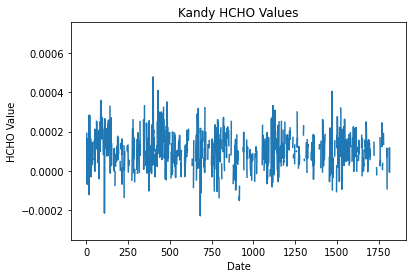

In [67]:
#plot the kandy HCHO values
import matplotlib.pyplot as plt
plt.plot(Kandy_df['HCHO Value'])
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.title('Kandy HCHO Values')
plt.show()


In [68]:
Kandy_df.head()

,HCHO Value,Location,Date,Next Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [69]:
Kandy_df.dtypes


HCHO Value    float64
Location       object
Date           object
Next Date      object
dtype: object

In [70]:
#droping Location, Next Date columns  for all dataframes

colombo_df = colombo_df.drop(['Location','Next Date'], axis=1)
Deniyaya_df = Deniyaya_df.drop(['Location','Next Date'], axis=1)
Nuwara_Eliya_df = Nuwara_Eliya_df.drop(['Location','Next Date'], axis=1)
Kandy_df = Kandy_df.drop(['Location','Next Date'], axis=1)
Bibile_df = Bibile_df.drop(['Location','Next Date'], axis=1)
Kurunegala_df = Kurunegala_df.drop(['Location','Next Date'], axis=1)
Jaffna_df = Jaffna_df.drop(['Location','Next Date'], axis=1)



In [71]:
# fill all HCHO values with the interpolation method using linear method

colombo_df['HCHO Value'] = colombo_df['HCHO Value'].interpolate()
Deniyaya_df['HCHO Value'] = Deniyaya_df['HCHO Value'].interpolate()
Nuwara_Eliya_df['HCHO Value'] = Nuwara_Eliya_df['HCHO Value'].interpolate()
Kandy_df['HCHO Value'] = Kandy_df['HCHO Value'].interpolate()
Bibile_df['HCHO Value'] = Bibile_df['HCHO Value'].interpolate()
Kurunegala_df['HCHO Value'] = Kurunegala_df['HCHO Value'].interpolate()
Jaffna_df['HCHO Value'] = Jaffna_df['HCHO Value'].interpolate()


In [72]:
#checking for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())


Colombo
 HCHO Value    0
Date          0
dtype: int64
Deniyaya
 HCHO Value    1
Date          0
dtype: int64
Nuwaraeliya
 HCHO Value    2
Date          0
dtype: int64
Kandy
 HCHO Value    0
Date          0
dtype: int64
Bibile
 HCHO Value    0
Date          0
dtype: int64
Kurunegala
 HCHO Value    0
Date          0
dtype: int64
Jaffna
 HCHO Value    0
Date          0
dtype: int64


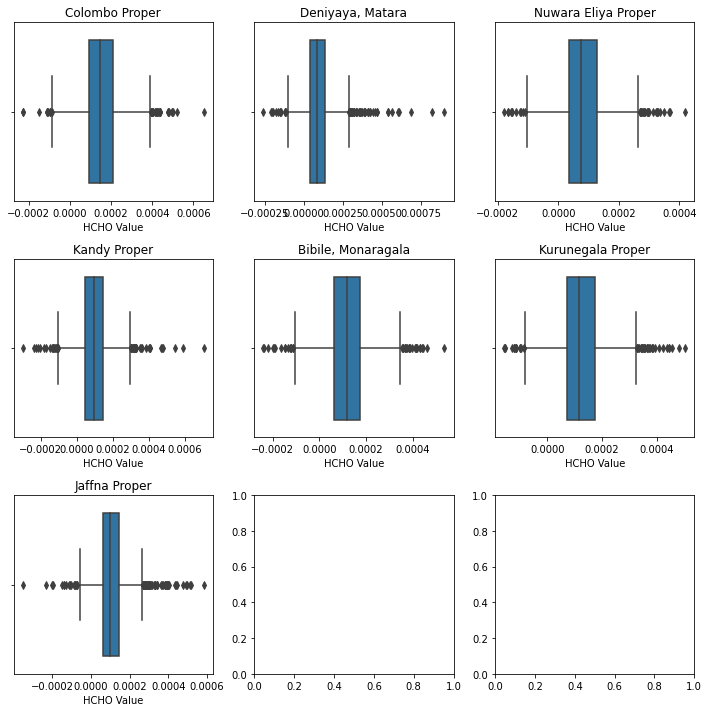

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of tuples with the dataframes and their corresponding locations
dfs_locations = [
    (colombo_df, 'Colombo Proper'),
    (Deniyaya_df, 'Deniyaya, Matara'),
    (Nuwara_Eliya_df, 'Nuwara Eliya Proper'),
    (Kandy_df, 'Kandy Proper'),
    (Bibile_df, 'Bibile, Monaragala'),
    (Kurunegala_df, 'Kurunegala Proper'),
    (Jaffna_df, 'Jaffna Proper')
]

# Set up the figure and grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Loop through the dataframes and locations, and create a boxplot for each
for (df, location), ax in zip(dfs_locations, axes):
    sns.boxplot(data=df, x='HCHO Value', ax=ax)
    ax.set_title(location)
    

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

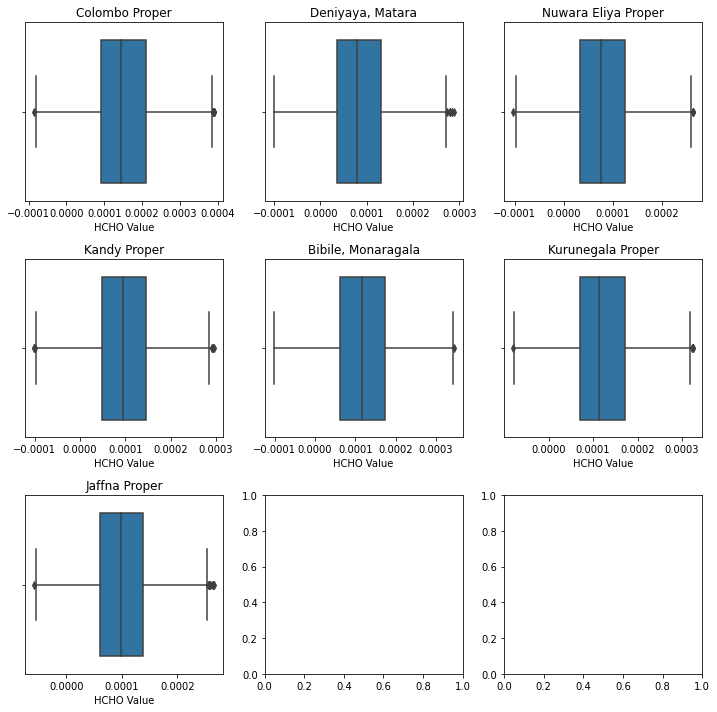

In [74]:
# remove outliers from all dataframes location wise

def remove_outliers(df):
    Q1 = df['HCHO Value'].quantile(0.25)
    Q3 = df['HCHO Value'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['HCHO Value'] >= (Q1 - 1.5 * IQR)) & (df['HCHO Value'] <= (Q3 + 1.5 * IQR))]
    return df

colombo_df = remove_outliers(colombo_df)
Deniyaya_df = remove_outliers(Deniyaya_df)
Nuwara_Eliya_df = remove_outliers(Nuwara_Eliya_df)
Kandy_df = remove_outliers(Kandy_df)
Bibile_df = remove_outliers(Bibile_df)
Kurunegala_df = remove_outliers(Kurunegala_df)
Jaffna_df = remove_outliers(Jaffna_df)

# Create a list of tuples with the dataframes and their corresponding locations
dfs_locations = [
    (colombo_df, 'Colombo Proper'),
    (Deniyaya_df, 'Deniyaya, Matara'),
    (Nuwara_Eliya_df, 'Nuwara Eliya Proper'),
    (Kandy_df, 'Kandy Proper'),
    (Bibile_df, 'Bibile, Monaragala'),
    (Kurunegala_df, 'Kurunegala Proper'),
    (Jaffna_df, 'Jaffna Proper')
]

# Set up the figure and grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the axes for easier iteration

# Loop through the dataframes and locations, and create a boxplot for each
for (df, location), ax in zip(dfs_locations, axes):
    sns.boxplot(data=df, x='HCHO Value', ax=ax)
    ax.set_title(location)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


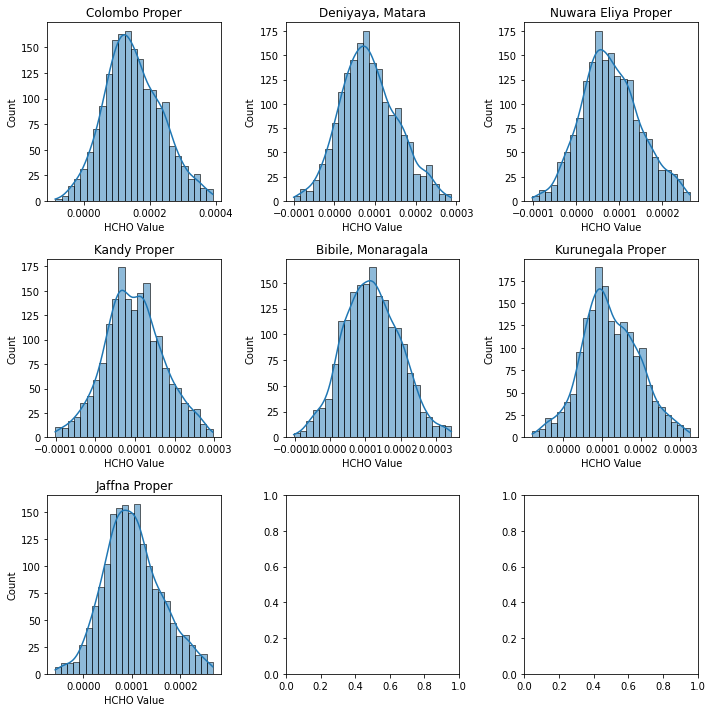

In [75]:
#plot all the locations HCHO values in a sub bar charts

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for (df, location), ax in zip(dfs_locations, axes):
    sns.histplot(df['HCHO Value'], ax=ax, kde=True)
    ax.set_title(location)

plt.tight_layout()
plt.show()



### ***`Saving dataframes to csv files`***

In [76]:
# save dfs to csv files in Outcome Data folder
colombo_df.to_csv('Outcome Data/colombo_df.csv', index=False)
Deniyaya_df.to_csv('Outcome Data/Deniyaya_df.csv', index=False)
Nuwara_Eliya_df.to_csv('Outcome Data/Nuwara_Eliya_df.csv', index=False)
Kandy_df.to_csv('Outcome Data/Kandy_df.csv', index=False)
Bibile_df.to_csv('Outcome Data/Bibile_df.csv', index=False)
Kurunegala_df.to_csv('Outcome Data/Kurunegala_df.csv', index=False)
Jaffna_df.to_csv('Outcome Data/Jaffna_df.csv', index=False)
